In [2]:
import sys
sys.path.append('C:/Users/farah.houdroge/Documents/GitHub/atomica/') # modify to local path to atomica
import atomica as at
import utils as ut
import os
if not os.path.exists('results'): os.makedirs('results')
if not os.path.exists('figs'): os.makedirs('figs')
'''
Script to run a scenario where coverage on interventions is specified.
'''

'\nScript to run a scenario where coverage on interventions is specified.\n'

In [3]:
facility_code = 'mt-darwin_hosp_ZW' # specify facility code
facility_name = 'Mt Darwin District Hospital, Zimbabwe' # specify facility name

In [4]:
# Atomica project definition
P = at.Project(framework='files/carbomica_framework.xlsx', databook='files/carbomica_databook.xlsx',do_run=False)

In [5]:
P.settings.sim_dt    = 1 # simulation timestep
P.settings.sim_start = 2010 # simulation start year
P.settings.sim_end   = 2030 # simulation end year

In [6]:
# Load program and define variables for program runs
progset = P.load_progbook('files/carbomica_progbook_{}.xlsx'.format(facility_code))

In [7]:
start_year = 2024 # programs start year
coverage = 0.5 # 50% coverage of interventions

In [8]:
# Option 1: increase coverage for all interventions
coverage_scenario = {prog: at.TimeSeries(start_year,coverage) for prog in progset.programs.keys()}

Option 2: increase coverage for specific interventions
coverage_scenario = {'energy_led': at.TimeSeries(start_year,coverage),
                     'electric_cars': at.TimeSeries(start_year,coverage)
                     }

In [9]:
instructions = at.ProgramInstructions(start_year=start_year, coverage=coverage_scenario) # define program instructions
result_coverage = P.run_sim(P.parsets[0],P.progsets[0], progset_instructions=instructions, result_name='{:.0f}% coverage'.format(coverage*100)) # run budget scenario

Elapsed time for running "default": 0.0593s


<Figure size 432x288 with 0 Axes>

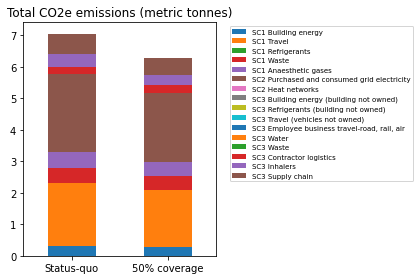

Emissions results saved: results/emissions_coverage_scen_mt-darwin_hosp_ZW.xlsx
Emissions bar plots saved: figs/emissions_coverage_scen_mt-darwin_hosp_ZW.xlsx


,SC1 Building energy,SC1 Travel,SC1 Refrigerants,SC1 Waste,SC1 Anaesthetic gases,SC2 Purchased and consumed grid electricity,SC2 Heat networks,SC3 Building energy (building not owned),SC3 Refrigerants (building not owned),SC3 Travel (vehicles not owned),"SC3 Employee business travel-road, rail, air",SC3 Water,SC3 Waste,SC3 Contractor logistics,SC3 Inhalers,SC3 Supply chain
Status-quo,0.31,2.0,0.0,0.49,0.51,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.39,0.66
50% coverage,0.2945,1.8,0.0,0.441,0.4335,2.205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.312,0.561


In [10]:
# Calculate emissions and allocation
ut.calc_emissions([result_coverage],start_year,facility_code,file_name='emissions_coverage_scen_{}'.format(facility_code))